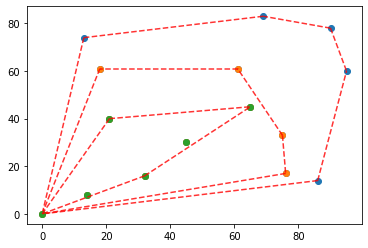

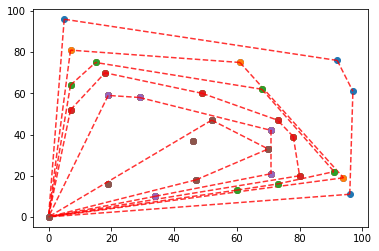

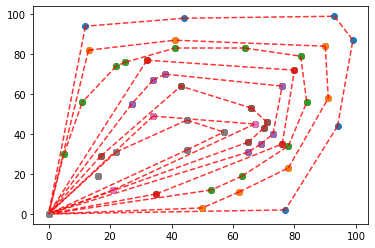

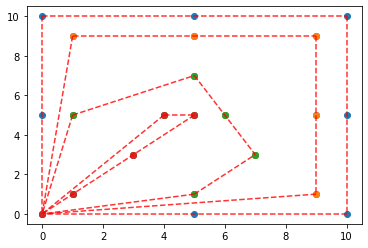

In [19]:
import warnings
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull
warnings.filterwarnings('ignore')

def collinear(x1, y1, x2, y2, x3, y3): 
    a = x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2) 
    return a == 0

for ind in range(1,5):
    filepath = 'layer'+str(ind)+'.txt'
    with open(filepath) as f:
        lines = f.read().splitlines()
        count = lines[0]
        lines = lines[1:]
        points = []
        for i in lines:
            temp = i.split(" ")
            points.append([temp[0],temp[1]])
        points = np.asarray(points).astype(int)

        with open("layer_out"+str(ind)+".txt", "a") as myfile:
            while len(points)>3:
                hull = ConvexHull(points)
                plt.plot(points[:,0], points[:,1], 'o')

                layers = []
                edges = []
                for simplex in hull.simplices:  #convex hull edge의 List
                    plt.plot(points[simplex, 0], points[simplex, 1], 'r--', alpha=0.8)
                    layers = np.append(layers, simplex)
                layers = layers.astype(int)
                for simplex in hull.simplices:  #convex hull edge의 List
                    p1 = simplex[0]
                    p3 = simplex[1]
                    for index, p2 in enumerate(points):
                        try:
                            if(index == 0):
                                continue                                
                            if(collinear(points[p1,0], points[p1,1], p2[0], p2[1], points[p3,0], points[p3,1])):
                                layers = np.append(layers, index)
                        except:
                            continue
                layers = np.unique(layers)
                points = np.delete(points, layers[1:], axis=0)
                myfile.write(' '.join(layers.astype(str)))
                myfile.write('\r\n')
            myfile.close()
            plt.show()